# 🌳 Análisis de Deforestación con Machine Learning

Este notebook aborda la problemática de la **deforestación** mediante el uso de algoritmos de **clustering y aprendizaje automático**.  
El objetivo es identificar patrones y segmentaciones que permitan comprender mejor los factores que influyen en la pérdida de bosques.

---

## 🎯 Objetivos
- Analizar datos relacionados con la deforestación.  
- Aplicar técnicas de **preprocesamiento y normalización**.  
- Utilizar algoritmos de **clustering** para agrupar áreas según sus características.  
- Visualizar los resultados y extraer conclusiones interpretables.  

---

## 🚀 Metodología
1. **Carga y exploración de datos** → revisión de las variables disponibles.  
2. **Preprocesamiento** → limpieza, normalización (ej. MinMaxScaler) y transformación de los datos.  
3. **Modelado** → aplicación de algoritmos de clustering como **K-Means, DBSCAN o Jerárquico**.  
4. **Evaluación** → comparación de métricas (Silhouette, Calinski-Harabasz, Davies-Bouldin).  
5. **Visualización** → gráficos en 2D/3D para interpretar los resultados.  

---

## 📊 Resultados esperados
- Identificación de **zonas críticas** de deforestación.  
- Segmentación de áreas con patrones similares de impacto ambiental.  
- Insights que sirvan como base para **estrategias de conservación** y toma de decisiones.  

---

## ✅ Conclusión
Este análisis muestra cómo el **clustering** puede ser una herramienta valiosa para comprender fenómenos ambientales complejos,  
ofreciendo una visión clara de las dinámicas de deforestación y ayudando a diseñar políticas más efectivas de protección forestal.


In [1]:
!pip freeze     #para saber cuáles librerías están preinstaladas en Colab

aext-assistant @ file:///private/var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_c3ggzgbxl5/croot/aext-assistant_1746560150370/work
aext-assistant-server @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_7fizob4pzy/croot/aext-assistant-server_1746552988949/work
aext-core @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_d1xazndquk/croot/aext-core_1746546092962/work
aext-core-server @ file:///private/var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_aev4ofboaa/croot/aext-core-server_1746542351523/work
aext-panels @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_ad18lo8pif/croot/aext-panels_1746560096298/work
aext-panels-server @ file:///private/var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_87cpzf1a0s/croot/aext-panels-server_1746552964751/work
aext-project-filebrowser-server @ file:///private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_0ayzciefrt/croot/aext-project-filebrowser-server_1746562212396/work/back

In [2]:
# https://es.wikipedia.org/wiki/%C3%8Dndice_de_vegetaci%C3%B3n_de_diferencia_normalizada
# https://es.wikipedia.org/wiki/Landsat
# https://scikit-learn.org/stable/modules/clustering.html#clustering


# CARGAMOS LAS LIBRERÍAS QUE USAREMOS
import numpy as np
import pandas as pd
from google.colab import files

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib import colors

from sklearn.cluster import KMeans
# para que muestre los gráficos
%matplotlib inline

ModuleNotFoundError: No module named 'google.colab'

# 🌱 Función para calcular NDVI

La siguiente función calcula el **Índice de Vegetación de Diferencia Normalizada (NDVI)** a partir de las bandas **roja** e **infrarroja** de una imagen satelital.

---

## 📘 Definición de NDVI
El NDVI se calcula con la fórmula:

\[
NDVI = \frac{(NIR - RED)}{(NIR + RED)}
\]

- **NIR** → banda de infrarrojo cercano.  
- **RED** → banda roja.  
- Valores típicos:
  - Cercanos a **1** → vegetación sana y densa.  
  - Cercanos a **0** → áreas sin vegetación.  
  - Negativos → agua, nieve o nubes.  

In [ ]:
def ndvi(file_red, file_nir):
    '''
    Calcula el índice NDVI para las imágenes guardadas en la carpeta usando la
    banda roja y la infrarroja, según la definición.
    Devuelve el np.array resultante
    Parámetros: carpeta, nro de banda Rojo y nro de banda IR, año si corresponde
    '''
    # defino el array ndvi, pero si b_red + b_ir = 0. -> ndvi = -999.
    ndvi = np.where((file_nir + file_red) == 0., -999., (file_nir - file_red) /
                    (file_nir + file_red))

    return ndvi     # 'ndvi' es un array de numpy


In [ ]:
# Definimos las bandas espectrales a cargar

# Download the .npy files from the raw URLs
!wget 'https://github.com/palasatenea66/DATASETS/raw/main/LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy'
!wget 'https://github.com/palasatenea66/DATASETS/raw/main/LT05_L1TP_230077_19860107_20170218_01_T1_sr_band5.npy'
!wget 'https://github.com/palasatenea66/DATASETS/raw/main/LC08_L1TP_230077_20171230_20180103_01_T1_sr_band4.npy'
!wget 'https://github.com/palasatenea66/DATASETS/raw/main/LC08_L1TP_230077_20171230_20180103_01_T1_sr_band5.npy'


banda_red_1986 = np.load('LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy')
banda_nir_1986 = np.load('LT05_L1TP_230077_19860107_20170218_01_T1_sr_band5.npy')
banda_red_2017 = np.load('LC08_L1TP_230077_20171230_20180103_01_T1_sr_band4.npy')
banda_nir_2017 = np.load('LC08_L1TP_230077_20171230_20180103_01_T1_sr_band5.npy')
n_clusters = 3


--2025-08-07 23:07:46--  https://github.com/palasatenea66/DATASETS/raw/main/LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/palasatenea66/DATASETS/main/LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy [following]
--2025-08-07 23:07:47--  https://raw.githubusercontent.com/palasatenea66/DATASETS/main/LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7385468 (7.0M) [application/octet-stream]
Saving to: ‘LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy’

LT05_L1TP_230077_19 100%[======

In [ ]:
!ls

LC08_L1TP_230077_20171230_20180103_01_T1_sr_band4.npy
LC08_L1TP_230077_20171230_20180103_01_T1_sr_band5.npy
LT05_L1TP_230077_19860107_20170218_01_T1_sr_band4.npy
LT05_L1TP_230077_19860107_20170218_01_T1_sr_band5.npy
sample_data


In [ ]:
banda_red_1986

array([[ 4389,  4426,  4315, ...,  2134,  2171,  2171],
       [ 4426,  4537,  4426, ...,  2134,  2134,  2171],
       [ 3866,  3828,  3716, ...,  2171,  2171,  2134],
       ...,
       [-9999, -9999, -9999, ...,  2281,  2356,  2281],
       [-9999, -9999, -9999, ...,  2356,  2356,  2356],
       [-9999, -9999, -9999, ...,  2356,  2356,  2281]], dtype=int16)

In [ ]:
banda_red_1986.shape

(1483, 2490)

In [ ]:
banda_red_2017.shape

(1492, 2504)

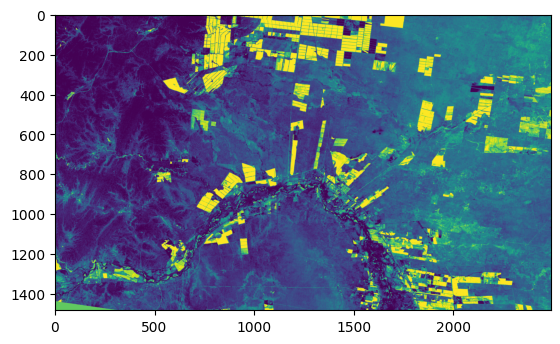

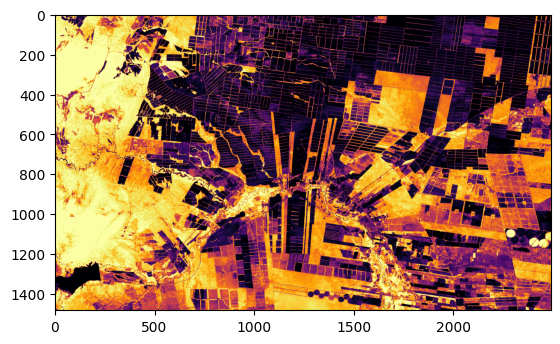

In [ ]:
'''Recortar las imágenes a la zona comprendida entre las coordenadas
24.867°N, 64.539°W, 25.290°S, 63.829°E
Calcular el NDVI para cada imagen por año y apilarlas
Clasificar el apilado de NDVI utilizando el método de k-means con 3 clases
espectrales
Reclasificar la escena según:
    * zonas con alto NDVI que no cambiaron (color  RGB: 45, 207, 96)
    * zonas con bajo NDVI que no cambiaron (color  RGB: 255, 255, 191)
    * zonas con disminución de NDVI (color  RGB: 252, 141, 89)
Imprimir la imagen clasificada obtenida '''

# calculo ndvi para 1986 y 2017 en la zona recortada
# ambos son np array
# Se calcula el NDVI (Índice de Vegetación de Diferencia Normalizada) para cada año.

ndvi_1986 = ndvi(banda_red_1986, banda_nir_1986)
ndvi_2017_A = ndvi(banda_red_2017, banda_nir_2017)

# recorto para que ambos array tengan la misma cantidad de filas/ columnas
ndvi_2017 = ndvi_2017_A[:1483, :2490]


# muestro imagenes

plt.imshow(ndvi_1986, vmin = np.percentile(ndvi_1986.flatten(),5), vmax
            = np.percentile(ndvi_1986.flatten(), 95), cmap = 'viridis')
plt.show()
plt.imshow(ndvi_2017, vmin = np.percentile(ndvi_2017.flatten(),5), vmax
            = np.percentile(ndvi_2017.flatten(), 95), cmap = 'inferno')
plt.show()


In [ ]:
# apilo ambos array
df_ndvi = pd.DataFrame({'ndvi_1986': ndvi_1986.flatten(),
                        'ndvi_2017': ndvi_2017.flatten()})
print(f'Shape de ndvi: ´{df_ndvi.shape}')
print(f'Primeras 20 líneas de ndvi:\n {df_ndvi.head(20)}')

Shape de ndvi: ´(3692670, 2)
Primeras 20 líneas de ndvi:
     ndvi_1986  ndvi_2017
0   -0.426158   0.783563
1   -0.394894   0.800377
2   -0.401429   0.839165
3   -0.416706   0.849752
4   -0.435464   0.845601
5   -0.411703   0.854213
6   -0.398157   0.853548
7   -0.428453   0.839528
8   -0.430296   0.814405
9   -0.416667   0.805813
10  -0.416667   0.822866
11  -0.420587   0.824789
12  -0.415413   0.808157
13  -0.425832   0.824190
14  -0.433518   0.805263
15  -0.406953   0.801015
16  -0.411921   0.803030
17  -0.405934   0.810819
18  -0.390542   0.845856
19  -0.391098   0.863122


In [ ]:
'''
Clasificar el apilado de NDVI utilizando el método de k-means con 3 clases
espectrales
'''

# invoco un clasificador kmeans c/ 3 clusters, fijo semilla x reproducibilidad
kmeans = KMeans(n_clusters = 3, random_state = 7)
ndvi_clasificado = kmeans.fit_predict(df_ndvi)  # fitea y clasifica


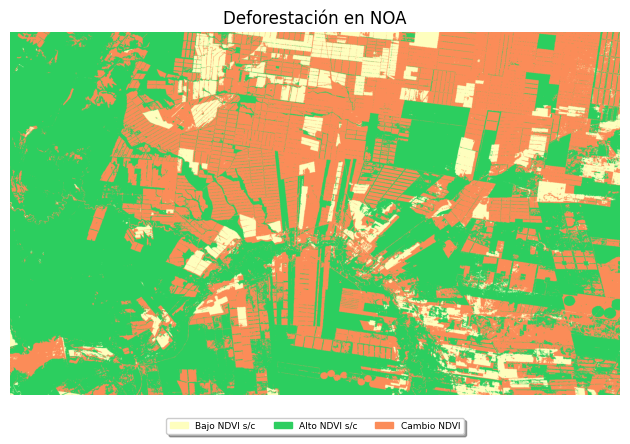

In [ ]:
'''
Reclasificar la escena según:
    * zonas con alto NDVI que no cambiaron (color  RGB: 45, 207, 96)
    * zonas con bajo NDVI que no cambiaron (color  RGB: 255, 255, 191)
    * zonas con disminución de NDVI (color  RGB: 252, 141, 89)
Imprimir la imagen clasificada obtenida
'''

# paso los colores RGB como tupla normalizada
color_ndvi = colors.ListedColormap([
    (252/256, 141/256, 89/256),   # zonas con disminución de NDVI
    (45/256, 207/256, 96/256),    # zonas con alto NDVI sin cambio
    (255/256, 255/256, 191/256)   # zonas con bajo NDVI sin cambio
])


# con los 'limites' apareo los colores con las clases y creo norma de color
limites = [0, 1, 2, 3]
norm_ndvi = colors.BoundaryNorm(limites, color_ndvi.N)
# texto para la figura
text = ['Cambio NDVI', 'Alto NDVI s/c',  'Bajo NDVI s/c']
# apareo texto con color
box = [mpatches.Patch(color = color_ndvi(i), label="{:s}".format(text[i]))
        for i in range(len(text))]
leyenda = box[::-1]

# creo gráfico y lo guardo como archivo, además de mostrarlo
plt.imshow(ndvi_clasificado.reshape(ndvi_1986.shape), cmap = color_ndvi,
            norm = norm_ndvi)
plt.title('Deforestación en NOA')
plt.legend(handles = leyenda, fontsize = 6.5, loc='upper center',
            bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3)
#plt.colorbar(shrink = 0.5)
plt.axis('off')
plt.tight_layout()
plt.savefig('deforestacion.png', dpi = 1200) # guardo figura en archivo
plt.show()